In [1]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from Method import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data= pd.read_csv("D:\Study\DSEB 63 - NEU\Year 3\Sem 2\Thesis\Reviews.csv")
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [3]:
# Clean text
df_sampled = preprocess_data(data)
df = df_sampled[['Text']]
tokenized_reviews = df['Text'].apply(preprocess_text)
tokenized_reviews

0        [love, anna, ginger, thin, cooky, hoping, find...
1        [dont, chocolate, bell, plantation, site, four...
2        [first, coffee, tried, keurig, disappointed, f...
3        [item, shipped, unsealed, plastic, within, bro...
4        [cat, picky, eater, sometime, found, weruvia, ...
                               ...                        
49995    [mother, love, product, heard, great, thing, a...
49996    [compared, favorite, breakfast, kashi, honey, ...
49997    [love, good, coffee, bought, keurig, lavazza, ...
49998    [bought, month, buying, popcorn, flavorful, de...
49999    [popchips, original, potato, chip, deelish, be...
Name: Text, Length: 50000, dtype: object

In [4]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [5]:
# Creating the object for LsA model using gensim library
LSA = gensim.models.LsiModel
# Build LsA model
lsa_model = LSA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10,chunksize=1000)

In [6]:
lsa_model.print_topics()

[(0,
  '0.357*"like" + 0.283*"taste" + 0.243*"coffee" + 0.222*"water" + 0.218*"product" + 0.217*"food" + 0.200*"flavor" + 0.189*"good" + 0.183*"would" + 0.128*"really"'),
 (1,
  '-0.668*"water" + 0.558*"coffee" + -0.144*"food" + -0.125*"bottled" + 0.115*"flavor" + -0.109*"essentia" + 0.098*"like" + -0.085*"drinking" + -0.084*"electrolyte" + -0.080*"alkaline"'),
 (2,
  '-0.547*"coffee" + -0.476*"water" + 0.460*"food" + 0.110*"product" + -0.108*"taste" + 0.099*"cat" + 0.096*"ingredient" + 0.093*"would" + -0.087*"bottled" + -0.084*"drink"'),
 (3,
  '-0.543*"food" + -0.492*"coffee" + 0.340*"taste" + 0.322*"like" + 0.208*"flavor" + -0.119*"water" + -0.106*"cat" + 0.102*"chocolate" + 0.073*"sugar" + -0.063*"diet"'),
 (4,
  '-0.756*"product" + 0.340*"like" + 0.274*"food" + 0.212*"taste" + 0.154*"flavor" + -0.148*"amazon" + -0.075*"price" + -0.067*"would" + 0.062*"eating" + -0.060*"hair"'),
 (5,
  '0.527*"flavor" + -0.458*"like" + -0.290*"taste" + -0.272*"product" + -0.222*"food" + 0.156*"woul

In [7]:
# print('\nPerplexity: ', lsa_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. the lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lsa = CoherenceModel(model=lsa_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('\nCoherence Score: ', coherence_lsa)


Coherence Score:  0.4506999707623452


***
Method to find optimal number of topics
***

In [8]:
def compute_coherence_values(dictionary, corpus, texts, end, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, end, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [9]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, end=50, step=1)

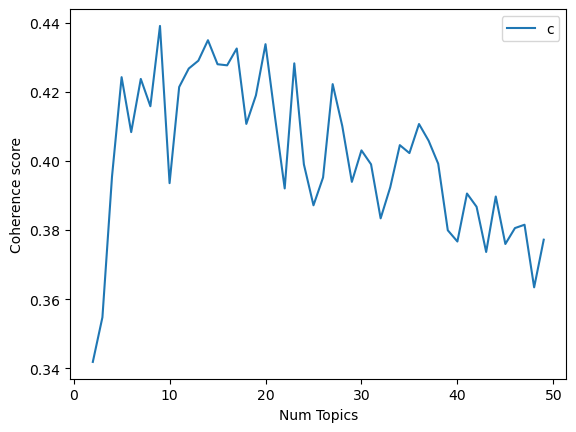

In [10]:
# Show graph
end=50; start=2; step=1
x = range(start, end, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3419
Num Topics = 3  has Coherence Value of 0.3548
Num Topics = 4  has Coherence Value of 0.3955
Num Topics = 5  has Coherence Value of 0.4242
Num Topics = 6  has Coherence Value of 0.4083
Num Topics = 7  has Coherence Value of 0.4237
Num Topics = 8  has Coherence Value of 0.4158
Num Topics = 9  has Coherence Value of 0.4391
Num Topics = 10  has Coherence Value of 0.3936
Num Topics = 11  has Coherence Value of 0.4214
Num Topics = 12  has Coherence Value of 0.4267
Num Topics = 13  has Coherence Value of 0.429
Num Topics = 14  has Coherence Value of 0.4349
Num Topics = 15  has Coherence Value of 0.428
Num Topics = 16  has Coherence Value of 0.4277
Num Topics = 17  has Coherence Value of 0.4325
Num Topics = 18  has Coherence Value of 0.4107
Num Topics = 19  has Coherence Value of 0.419
Num Topics = 20  has Coherence Value of 0.4338
Num Topics = 21  has Coherence Value of 0.4125
Num Topics = 22  has Coherence Value of 0.3921
Num Topics = 23  has Coh

In [12]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.044*"coffee" + 0.025*"flavor" + 0.021*"like" + 0.019*"taste" + 0.014*"good" + 0.008*"great" + 0.008*"love" + 0.008*"strong" + 0.007*"green" + 0.007*"make"'),
 (1,
  '0.078*"treat" + 0.021*"dog" + 0.020*"love" + 0.016*"salt" + 0.015*"baby" + 0.009*"pouch" + 0.008*"moist" + 0.007*"size" + 0.007*"made" + 0.007*"small"'),
 (2,
  '0.028*"chip" + 0.023*"chocolate" + 0.020*"calorie" + 0.017*"taste" + 0.016*"cooky" + 0.012*"like" + 0.012*"good" + 0.011*"great" + 0.010*"sweet" + 0.010*"sugar"'),
 (3,
  '0.026*"amazon" + 0.022*"price" + 0.020*"product" + 0.019*"store" + 0.016*"great" + 0.012*"order" + 0.011*"good" + 0.011*"find" + 0.010*"love" + 0.010*"time"'),
 (4,
  '0.020*"product" + 0.018*"ingredient" + 0.015*"sugar" + 0.015*"organic" + 0.014*"butter" + 0.013*"peanut" + 0.013*"cereal" + 0.012*"free" + 0.011*"gluten" + 0.011*"rice"'),
 (5,
  '0.021*"like" + 0.014*"good" + 0.012*"great" + 0.012*"taste" + 0.010*"love" + 0.009*"make" + 0.009*"really" + 0.008*"flavor" + 0.008*"little" +

In [13]:
# Naming each topic by the word with height weight. 
topic_names = []
for topic_id, topic_data in model_topics:
    max_word, max_weight = max(topic_data, key=lambda x: x[1])
    topic_names.append((topic_id, max_word))
print('----------------------------------------------')
print("Topic names based on word with highest weight:")
for topic_id, topic_name in topic_names:
    print("Topic {}: {}".format(topic_id, topic_name))

----------------------------------------------
Topic names based on word with highest weight:
Topic 0: coffee
Topic 1: treat
Topic 2: chip
Topic 3: amazon
Topic 4: product
Topic 5: like
Topic 6: water
Topic 7: popcorn
Topic 8: food
